# YELP Business Datasets Cleaning and Manipulation

This file filled up some missing price values, remove closed and non-restaurant business, and corrected wrong business names. The purposes are to decrease missing value and increase the accuracy rate of analysis.

### Methodology 

After preliminary cleaning and manipulating of Yelp Business Dataset, the missing value rate is 12.7% which is higher than the acceptable rate. We decided to investigate deeply to the missing data.

1. Define particular restuarants containing specific words should be clssified to price 1.
1. Define particular restaurants with specific tags should be classified to price 1.
1. Investigate the restaurants are closed at present. 
1. Investigate the business in the Yelp Business Dataset are not restuarants.
1. Investigate the restaurants have multiple locations in Orlando, FL and could be match with existing restaurants.
1. Investigate the restaurants can't find on Yelp.com.
1. Investigate the restaurants' containing prices on Yelp.com.

### Results

We reduced missing data from 346 to 185 which causes to decrease the missing rate from 12.7% to 9%.

### References

Cheema, Jehanzeb R. (2014) "Some General Guidelines for Choosing Missing Data Handling Methods in Educational Research,"
*Journal of Modern Applied Statistical Methods:* Vol. 13 : Iss. 2 , Article 3.

In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MultiLabelBinarizer
import missingno as msno

In [2]:
# Load Files
data = [json.loads(line) for line in open("data/business.json", 'r',encoding='utf-8')]
missing_df = pd.read_excel('data/missing_restaurants.xlsx')

In [3]:
# Normalize JSON file
df = pd.io.json.json_normalize(data)

C:\Users\aliso\AppData\Local\Temp/ipykernel_29216/2544071918.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pd.io.json.json_normalize(data)


In [4]:
# Filter out non-Orlando restaurants
# Filter out non-restaurants
# Drop columns

df_Orlando = df[df.city == 'Orlando']
restaurant_df = df_Orlando[df_Orlando.categories.str.contains("Restaurants") == True]
restaurant_df.drop('attributes', axis = 1)
restaurant_df.drop(columns=['city', 'state', 'attributes.RestaurantsTableService','attributes.Caters','attributes.GoodForMeal','attributes.OutdoorSeating','attributes.BikeParking','attributes.WheelchairAccessible','attributes.HappyHour',
       'attributes.BusinessAcceptsBitcoin','hours.Monday', 'hours.Tuesday',
       'hours.Wednesday', 'hours.Thursday', 'hours.Friday', 'hours.Saturday',
       'hours.Sunday', 'attributes.GoodForKids',
       'attributes.ByAppointmentOnly', 'hours', 'attributes.AcceptsInsurance',
       'attributes', 'attributes.HairSpecializesIn',
       'attributes.GoodForDancing', 'attributes.BestNights',
       'attributes.Music', 'attributes.BYOB', 'attributes.CoatCheck',
       'attributes.Smoking', 'attributes.DriveThru', 'attributes.BYOBCorkage',
       'attributes.Corkage', 'attributes.RestaurantsCounterService',
       'attributes.AgesAllowed', 'attributes.DietaryRestrictions',
       'attributes.Open24Hours','attributes.Ambience','attributes.HasTV','attributes.DogsAllowed','attributes.NoiseLevel'], inplace=True)

restaurant_df.columns

C:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['business_id', 'name', 'address', 'postal_code', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'categories',
       'attributes.WiFi', 'attributes.BusinessParking',
       'attributes.BusinessAcceptsCreditCards',
       'attributes.RestaurantsReservations',
       'attributes.RestaurantsGoodForGroups',
       'attributes.RestaurantsPriceRange2', 'attributes.Alcohol',
       'attributes.RestaurantsTakeOut', 'attributes.RestaurantsAttire',
       'attributes.RestaurantsDelivery'],
      dtype='object')

<AxesSubplot:>

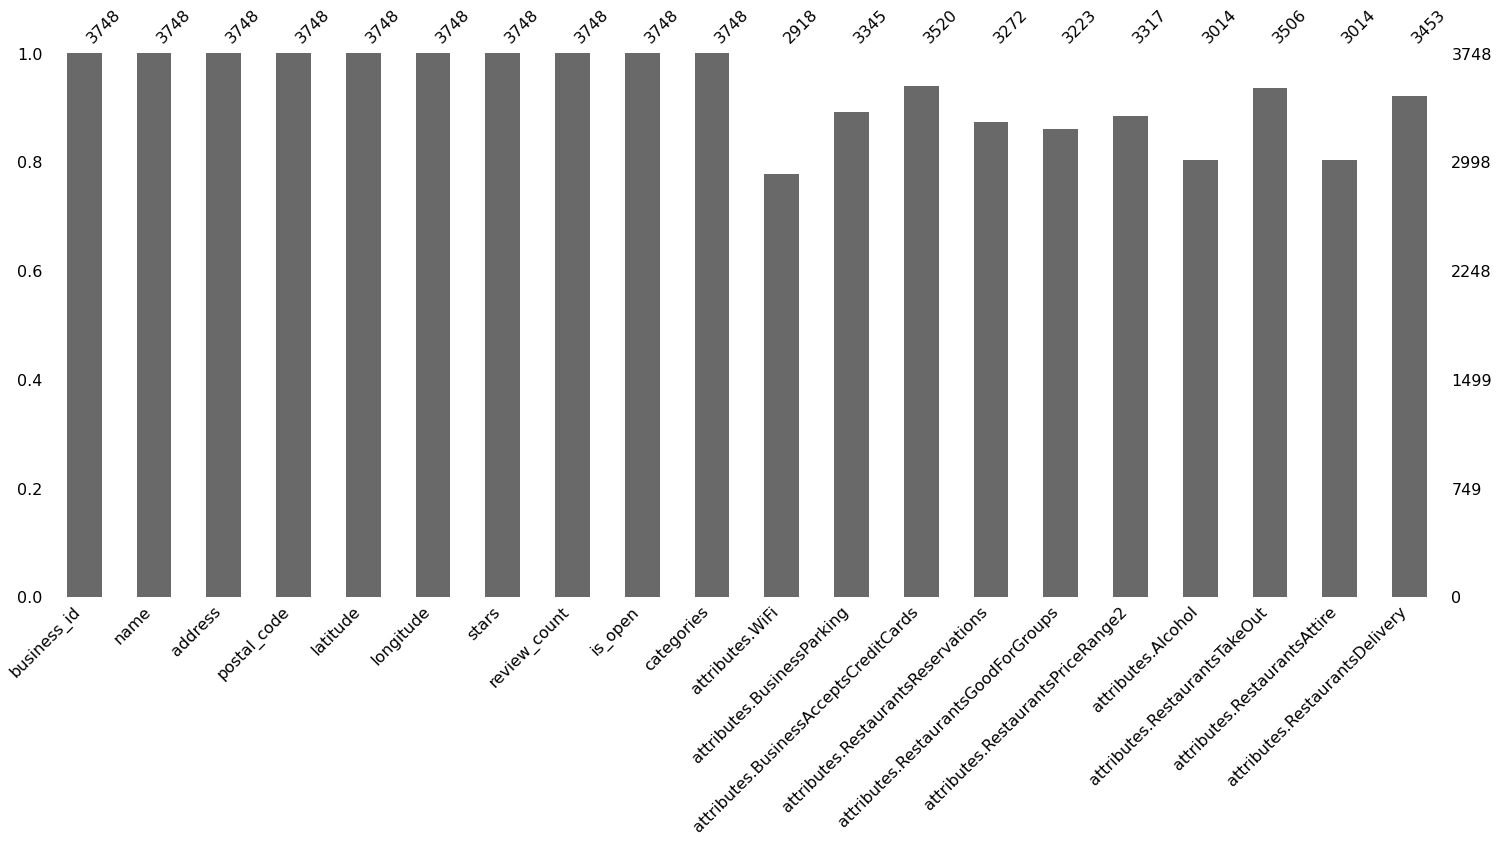

In [5]:
msno.bar(restaurant_df)

In [6]:
# Remove closed restaurants
# restaurant_df = restaurant_df[restaurant_df['is_open'] == 1]
# restaurant_df.drop(columns=['is_open'], inplace=True)
restaurant_df.head()

,business_id,name,address,postal_code,latitude,longitude,stars,review_count,is_open,categories,attributes.WiFi,attributes.BusinessParking,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsReservations,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.Alcohol,attributes.RestaurantsTakeOut,attributes.RestaurantsAttire,attributes.RestaurantsDelivery
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,32806,28.513265,-81.374707,4.5,135,1,"Restaurants, American (New), Bakeries, Dessert...",NaN,"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,1,NaN,True,NaN,False
16,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,32830,28.350498,-81.542819,3.0,7,1,"Restaurants, American (New), Food Court, Flowe...",u'free',"{'garage': False, 'street': False, 'validated'...",True,False,True,2,NaN,None,u'casual',None
22,ynTjh_FdhbG5hY69HsEoaA,Cascade Restaurant,"Hyatt Regency Grand Cypress, 1 Grand Cypress Blvd",32836,28.381945,-81.510327,3.5,18,0,"Hotels, American (Traditional), Restaurants, E...",'free',"{'garage': False, 'street': False, 'validated'...",True,True,True,2,'full_bar',True,u'casual',False
51,w4qVflIAbdklzG3mnKmQsg,Magical Pizza Express,"3262 Vineland Rd, Ste 106",32811,28.520500,-81.443950,1.0,8,1,"Italian, Restaurants",NaN,NaN,NaN,NaN,NaN,NaN,u'none',NaN,u'casual',NaN
63,qbZJh9lR0gh4Wca96NQv9g,Chuck E. Cheese,7456 W Colonial Dr,32818,28.551335,-81.483167,2.0,15,1,"Pizza, Event Planning & Services, Arcades, Par...",'free',"{'garage': False, 'street': False, 'validated'...",True,True,True,1,'none',True,'casual',True


<AxesSubplot:>

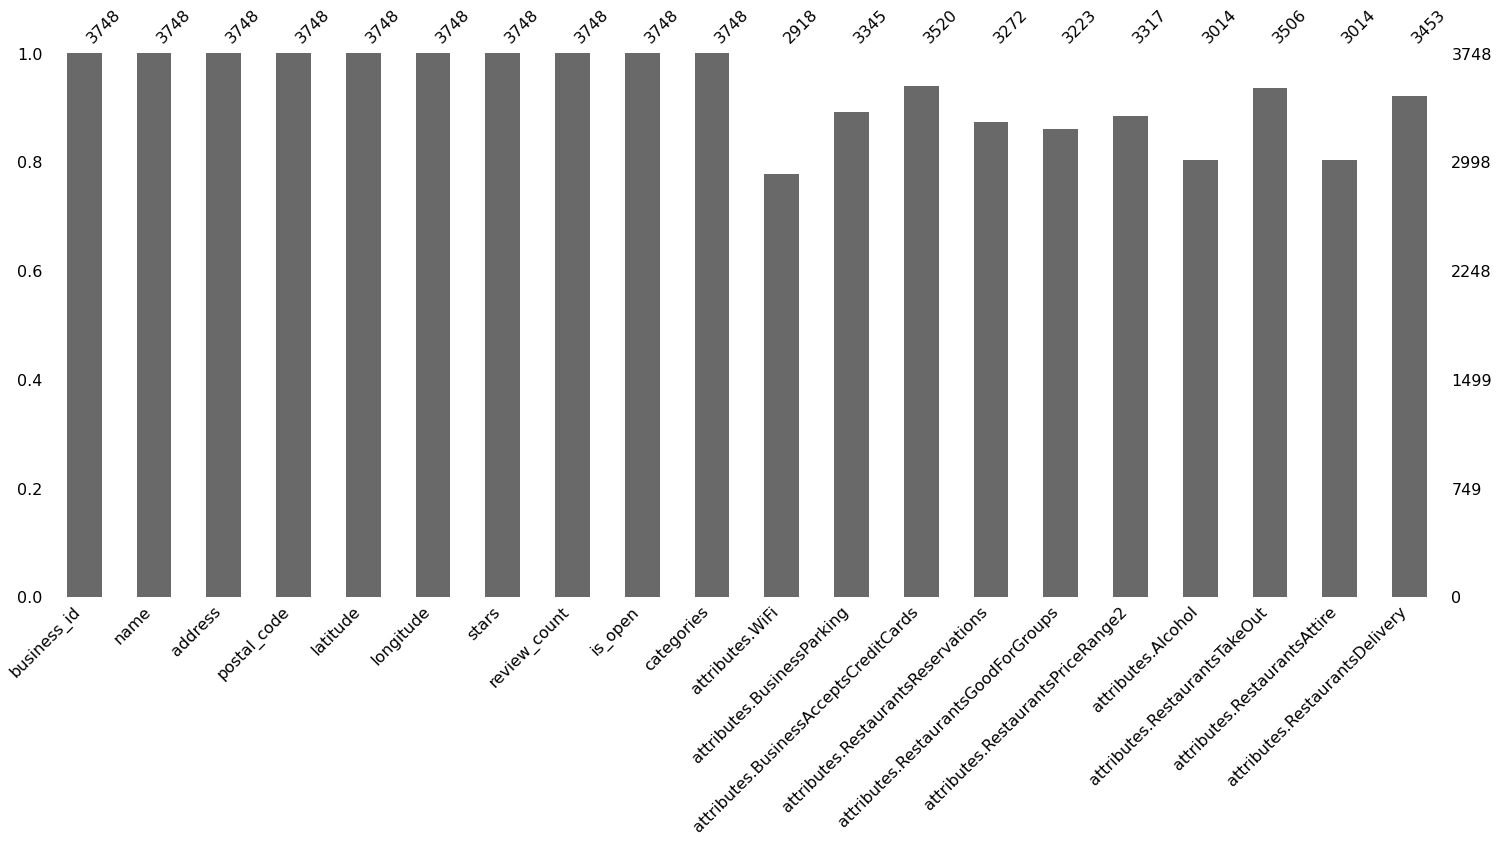

In [7]:
msno.bar(restaurant_df)

In [8]:
# Rename columns
restaurant_df.rename(columns={"attributes.WiFi":"wifi","attributes.BusinessParking":"parking","attributes.BusinessAcceptsCreditCards":"creditcard","attributes.RestaurantsReservations":"reserve","attributes.RestaurantsGoodForGroups":"groups","attributes.Alcohol":"alcohol", "attributes.RestaurantsTakeOut":"takeout","attributes.RestaurantsAttire":"attire","attributes.RestaurantsDelivery":"delivery"}, inplace=True)
# Convert price string to float
restaurant_df['attributes.RestaurantsPriceRange2'] = restaurant_df['attributes.RestaurantsPriceRange2'].astype(float)
restaurant_df.head()

C:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\aliso\AppData\Local\Temp/ipykernel_29216/1126629191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_df['attributes.RestaurantsPriceRange2'] = restaurant_df['attributes.RestaurantsPriceRange2'].astype(float)


,business_id,name,address,postal_code,latitude,longitude,stars,review_count,is_open,categories,wifi,parking,creditcard,reserve,groups,attributes.RestaurantsPriceRange2,alcohol,takeout,attire,delivery
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,32806,28.513265,-81.374707,4.5,135,1,"Restaurants, American (New), Bakeries, Dessert...",NaN,"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,1.0,NaN,True,NaN,False
16,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,32830,28.350498,-81.542819,3.0,7,1,"Restaurants, American (New), Food Court, Flowe...",u'free',"{'garage': False, 'street': False, 'validated'...",True,False,True,2.0,NaN,None,u'casual',None
22,ynTjh_FdhbG5hY69HsEoaA,Cascade Restaurant,"Hyatt Regency Grand Cypress, 1 Grand Cypress Blvd",32836,28.381945,-81.510327,3.5,18,0,"Hotels, American (Traditional), Restaurants, E...",'free',"{'garage': False, 'street': False, 'validated'...",True,True,True,2.0,'full_bar',True,u'casual',False
51,w4qVflIAbdklzG3mnKmQsg,Magical Pizza Express,"3262 Vineland Rd, Ste 106",32811,28.520500,-81.443950,1.0,8,1,"Italian, Restaurants",NaN,NaN,NaN,NaN,NaN,NaN,u'none',NaN,u'casual',NaN
63,qbZJh9lR0gh4Wca96NQv9g,Chuck E. Cheese,7456 W Colonial Dr,32818,28.551335,-81.483167,2.0,15,1,"Pizza, Event Planning & Services, Arcades, Par...",'free',"{'garage': False, 'street': False, 'validated'...",True,True,True,1.0,'none',True,'casual',True


In [9]:
def remove_space(lst):
    new_lst = []
    for entry in lst:
        new_lst.append(entry.strip(' '))
    return new_lst

In [10]:
# Let's create a dataframe has all categories columns
test_df = restaurant_df.copy()
test_df['categories'] = test_df['categories'].str.split(",")
test_df['categories'] = [remove_space(entry) for entry in test_df['categories']]

mlb = MultiLabelBinarizer()
categories_dummy_df = pd.DataFrame(mlb.fit_transform(test_df['categories']),
                     columns=mlb.classes_, 
                     index=test_df.index)

test_dataset = pd.concat([restaurant_df, categories_dummy_df], axis=1)

In [11]:
# Save the dataframe as a CSV file
# categories_dummy_df.to_csv("data/categories_dummy_df.csv")

In [12]:
# Create a new 'status' column with a default value for new records
missing_df['status'] = '1.0'
missing_df

,business_id,name,price,status_1,status_2,status
0,w4qVflIAbdklzG3mnKmQsg,Magical Pizza Express,NaN,1.0,NaN,1.0
1,j4kjeLmlcMKG9fsqr5vjMQ,Crepe Delicious,NaN,4.0,NaN,1.0
2,Wo7xNKWlq3i5q20VkBb6IQ,Mejana Mediterranean,NaN,NaN,NaN,1.0
3,rIdojqgqK1IcxYAyJhsLLg,Muse 24h Caffee,NaN,NaN,NaN,1.0
4,deSmaMe9aoGTPI_-hpucvA,Synergize Nutrition,NaN,2.0,NaN,1.0
...,...,...,...,...,...,...
341,FPgJ84oZcwy1ci1o3bgOhQ,Osphere Neighborhood Grill and Bar,2.0,NaN,NaN,1.0
342,lx7xFvTrigH_mfVYhcPEwQ,Lu Garden,NaN,NaN,NaN,1.0
343,oRlO5kIe7czIoLsfnqd74g,Wang Sports BBQ,NaN,NaN,NaN,1.0
344,2MZzE0Bbqa1FMS_oTXU_Rg,'63 South,NaN,1.0,NaN,1.0


In [13]:
missing_df[missing_df.price.isnull()].shape

(320, 6)

In [14]:
# Create a new restaurants dataframe with valid price in Orlando, FL
df_Orlando = df[df.city == 'Orlando']
new_df = df_Orlando[df_Orlando.categories.str.contains("Restaurants") == True]
new_df = new_df.dropna(subset=['attributes.RestaurantsPriceRange2'])
new_df['attributes.RestaurantsPriceRange2'] = new_df['attributes.RestaurantsPriceRange2'].astype(float)

new_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes.BYOB,attributes.CoatCheck,attributes.Smoking,attributes.DriveThru,attributes.BYOBCorkage,attributes.Corkage,attributes.RestaurantsCounterService,attributes.AgesAllowed,attributes.DietaryRestrictions,attributes.Open24Hours
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,Orlando,FL,32830,28.350498,-81.542819,3.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,ynTjh_FdhbG5hY69HsEoaA,Cascade Restaurant,"Hyatt Regency Grand Cypress, 1 Grand Cypress Blvd",Orlando,FL,32836,28.381945,-81.510327,3.5,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,qbZJh9lR0gh4Wca96NQv9g,Chuck E. Cheese,7456 W Colonial Dr,Orlando,FL,32818,28.551335,-81.483167,2.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,EGZ0fhB9k0ZlI5sHda4vFw,Andy's Frozen Custard,5381 International Dr,Orlando,FL,32819,28.463278,-81.451181,4.5,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160259,pPZgvmZWK-jAmkCfZCE2Iw,El Gran Saman,29 S Semoran Blvd,Orlando,FL,32807,28.544014,-81.310527,3.5,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160405,M_RCIwaVAgs3ThLKnCwxtw,Narcoossee's,4401 Grand,Orlando,FL,32830,28.412621,-81.585816,4.0,311,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
160544,GTVOlps3_pCc9urmGc02Qg,Fresh Kitchen,"851 N Alafaya Trl, Ste Q-01",Orlando,FL,32828,28.557090,-81.206914,4.5,301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160546,E42dulQ-OfZ3caiKKh7J5w,LongHorn Steakhouse,3101 E Colonial Dr,Orlando,FL,32803,28.553748,-81.344369,4.0,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Get the price for the restaurant has multiple locations in Orlando, FL
counter = 0
for name in list(missing_df.name):
    if name in list(new_df.name):
        index = missing_df[missing_df.name == name].index.values[0]
        
        # mapping price range
        missing_df.loc[index,'price'] = np.nanmedian(
            new_df[new_df.name == name][
                'attributes.RestaurantsPriceRange2'].values)
        
        # record missing value type
        missing_df.loc[index,'status'] = 6.0
        counter += 1
     
print('Indice addressed within the step: {:f}'
      .format(counter))
print('Remaining missing value:  {:f}'
      .format(len(missing_df[missing_df.price.isnull()])))

Indice addressed within the step: 64.000000
Remaining missing value:  275.000000


In [16]:
# Set up the price as 1 to the data isin below lists.
name_list = ['Express', 'Deli', 'KFC', "Wendy's", 'Wok', 'Bakery', 'Fast Food',
                 'DELI', 'Market', 'Food Truck']
tag_list = ['Fast Food', 'Food Stands', 'Falafel', 'Hot Dogs', 
                'Waffles', 'Car Wash','Food Delivery Services', 'Street Vendors',
                'Gas Stations', 'Food Court', 'Delis', 'Convenience Stores']

In [17]:
# Correct the restaurant with wrong name

missing_df.loc[missing_df['business_id'] == '0rjvIOWhFLrSAr1IQJgACA', 'name'] = 'Green House Chinese Restaurants'
missing_df.loc[missing_df['business_id'] == 'HMKOmP-eau9BkZNcrJ3d3g', 'name'] = 'Two Guys Pasta & Pizza'
missing_df.loc[missing_df['business_id'] == 'ZVu5B89EnBLvdk18wKydjg', 'name'] = 'BurgerFi'

In [18]:
# Filter by the name list and set up price as 1
counter = 0
for name in list(missing_df[missing_df.price.isnull()].name):
    for key_word in name_list:
        if key_word in name:
            index = missing_df[missing_df.name == name].index.values[0]

            # mapping price range
            missing_df.loc[index,'price'] = 1.0
            # record missing value type
            missing_df.loc[index,'status'] = 5.0
            counter += 1
                    
print('Indice addressed within the step: {:f}'
      .format(counter))
print('Remaining missing value:  {:f}'
      .format(len(missing_df[missing_df.price.isnull()])))

Indice addressed within the step: 29.000000
Remaining missing value:  248.000000


In [19]:
# Filter by the tag list and set up price as 1
counter = 0
for name in list(missing_df[missing_df.price.isnull()].name):
    if name in list(test_dataset[test_dataset.fillna(0)[tag_list].sum(axis = 1) >= 1].name):
        index = missing_df[missing_df.name == name].index.values[0]

        # mapping price range
        missing_df.loc[index,'price'] = 1.0
        # record missing value type
        missing_df.loc[index,'status'] = 1.0
        counter += 1
                   
print('Indice addressed within the step: {:f}'
      .format(counter))
print('Remaining missing value:  {:f}'
      .format(len(missing_df[missing_df.price.isnull()])))

Indice addressed within the step: 45.000000
Remaining missing value:  210.000000


In [20]:
# status_1 == 2 means the restaurant is closed.
close_df = missing_df[missing_df['status_1'] == 2]
close_list = close_df.name.tolist()

# Remove closed restuarants
missing_df.drop(missing_df[missing_df.name.isin(close_list)].index.tolist(), inplace=True)

print('Indice addressed within the step: {:f}'
      .format(counter))
print('Remaining missing value:  {:f}'
      .format(len(missing_df[missing_df.price.isnull()])))

Indice addressed within the step: 45.000000
Remaining missing value:  197.000000


In [21]:
# status_1 == 4 means the restaurant can't be found in Yelp.com
nomatch_df = missing_df[missing_df['status_1'] == 4]
nomatch_list = nomatch_df.name.tolist()

# Remove the restaurant can't be found in Yelp.com
missing_df.drop(missing_df[missing_df.name.isin(nomatch_list)].index.tolist(), inplace=True)

print('Indice addressed within the step: {:f}'
      .format(counter))
print('Remaining missing value:  {:f}'
      .format(len(missing_df[missing_df.price.isnull()])))

Indice addressed within the step: 45.000000
Remaining missing value:  193.000000


In [22]:
# status_1 == 5 means the business is not a restaurant.
nores_df = missing_df[missing_df['status_1'] == 5]
nores_list = nores_df.name.tolist()
# Remove non-restaurant businesses.
missing_df.drop(missing_df[missing_df.name.isin(nores_list)].index.tolist(), inplace=True)

print('Indice addressed within the step: {:f}'
      .format(counter))
print('Remaining missing value:  {:f}'
      .format(len(missing_df[missing_df.price.isnull()])))

Indice addressed within the step: 45.000000
Remaining missing value:  187.000000


In [23]:
missing_df[missing_df.price.isnull()]

,business_id,name,price,status_1,status_2,status
2,Wo7xNKWlq3i5q20VkBb6IQ,Mejana Mediterranean,NaN,NaN,NaN,1.0
3,rIdojqgqK1IcxYAyJhsLLg,Muse 24h Caffee,NaN,NaN,NaN,1.0
5,DM_Ge3Feh-4xnIrHIDg4uw,The Bistro Restaurant and Bar,NaN,NaN,NaN,1.0
6,MVqv-Wgn772O5fqvgZy83A,Galeria,NaN,NaN,NaN,1.0
8,9R4uQYuIEj6YgkYxnAYX5w,Regal Eagle Smokehouse,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...
332,LErmbeyCfMblDXkEwGTw1Q,Hidden Sushi,NaN,1.0,NaN,1.0
333,sFaAUn3v2tvUhY_HAruSrQ,Asian Chao Oriental Eatery,NaN,1.0,NaN,1.0
338,1M2m-iSxR8RNZ_B6Dkielg,Tin And Taco Waterford,NaN,NaN,NaN,1.0
340,GUOlW_eoh44ApfU53qP8sw,Millie Moo's,NaN,NaN,NaN,1.0


In [24]:
# missing_df.to_csv('data/missing_df.csv')

## Yelp Business Dataset Mapping and Updating

In [25]:
# Copy files
restaurant_update_df = restaurant_df.copy()

In [26]:
restaurant_df.columns

Index(['business_id', 'name', 'address', 'postal_code', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'categories', 'wifi',
       'parking', 'creditcard', 'reserve', 'groups',
       'attributes.RestaurantsPriceRange2', 'alcohol', 'takeout', 'attire',
       'delivery'],
      dtype='object')

In [27]:
restaurant_update_df.shape

(3748, 20)

In [28]:
# Pass Boolean Mask to select cleaned dataset
yelp_bus_df = restaurant_update_df[(restaurant_update_df.business_id.isin(list(missing_df.business_id)) | restaurant_update_df['attributes.RestaurantsPriceRange2'].notna())]

In [29]:
# Let's check the shape of dataframe
yelp_bus_df.shape

(3632, 20)

In [30]:
# Update missing data 
for businessID in list(missing_df.business_id):
    if businessID in list(yelp_bus_df.business_id):
        index = yelp_bus_df[yelp_bus_df.business_id == businessID].index.values[0]
        price = missing_df[missing_df.business_id == businessID]['price']
        # mapping price range
        yelp_bus_df.loc[index,'attributes.RestaurantsPriceRange2'] = float(price)

C:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [31]:
# Let's check the shape of dataframe
yelp_bus_df[yelp_bus_df['attributes.RestaurantsPriceRange2'].isnull()].shape

(185, 20)

In [32]:
# Let's have a check
yelp_bus_df[yelp_bus_df.business_id == 'fgwhPaakfKqBZZ8DxBALLQ']['attributes.RestaurantsPriceRange2']

143059    1.0
Name: attributes.RestaurantsPriceRange2, dtype: float64

In [33]:
# yelp_bus_df.to_csv('data/yelp_bus_df.csv')